## Using CNN for the 3rd model with RELU as the activation Layer
### Better Model : Plotting the accuracy and the cross entropy¶
https://stackoverflow.com/questions/40146428/show-training-and-validation-accuracy-in-tensorflow-using-same-graph?noredirect=1&lq=1
+ Why Mini-batch of 100
    + That is Because we want to run it on GPU, distributed computation is possible to work in case of batch processing
    + with 1 image, we might get to the local minima, but that will be windy, it is more stable to do this with 100 images at one time, which is way more stable as we get an idea of the gradient by going through 100 images
    + Let's go deep, with Deep Neural Networks
    + We use a 5 Layer NN as next and change the activation function to a RELU function, which is a better option than the others
    + Why it is doing well, is because Sigmoid is flat on some regions which makes its gradient non-increasing which is one of the reasons for RELU doing better than the sigmoid activation function, and this problem is enhanced with large number of layers, and this caused vanishing gradient problem where the errors become very small.
    + It is always better to start fast and then decay the learning rate to get a better curve
    + Use regularization as well such as dropout so that we do not overfit, this could be seen through the disconnect between Test and training loss, we do not use dropout with the test set, dropout is pretty simple. It rolls the dice and selects 25% of the neurons and takes them out. It is a way of freezing the neurons for one given iteration
    + In the neural network, we need to contstrain the degrees of freedom to force the NN to create categories of your data. So best is always need a lots and lots of data and lot of processsing
    + The above cannot reach more than 98% as we are destroying the shape information

In [1]:
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.set_random_seed(0)
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X=tf.placeholder(tf.float32, [None, 784]) 
Y_=tf.placeholder(tf.float32, [None, 10])


# All 4 Hidden layers, going from top to bottom. First is 
K=200
L=100
M=60
N=30

W1=tf.Variable(tf.truncated_normal([28*28, K], stddev=0.1))
B1=tf.Variable(tf.zeros([K]))

W2=tf.Variable(tf.truncated_normal([K,L], stddev=0.1))
B2=tf.Variable(tf.zeros([L]))

W3=tf.Variable(tf.truncated_normal([L,M], stddev=0.1))
B3=tf.Variable(tf.zeros([M]))

W4=tf.Variable(tf.truncated_normal([M,N], stddev=0.1))
B4=tf.Variable(tf.zeros([N]))

W5=tf.Variable(tf.truncated_normal([N,10], stddev=0.1))
B5=tf.Variable(tf.zeros([10]))

#Model
XX=tf.reshape(X, [-1, 28*28])
Y1=tf.nn.relu(tf.matmul(XX, W1)+B1)
Y2=tf.nn.relu(tf.matmul(Y1, W2)+B2)
Y3=tf.nn.relu(tf.matmul(Y2, W3)+B3)
Y4=tf.nn.relu(tf.matmul(Y3, W4)+B4)

YLogits=tf.matmul(Y4,W5)+B5
Y= tf.nn.softmax(YLogits)

In [6]:
import math

#step for variable learning paramter
step=tf.placeholder(tf.int32)

#loss function
#cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=YLogits, labels=Y_)
cross_entropy= tf.reduce_mean(cross_entropy)*100

#correct answers
is_correct=tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))

#optimizer=tf.train.GradientDescentOptimizer(0.003)
lr=0.0001+tf.train.exponential_decay(0.003, step, 2000, 1/math.e)
train_step=tf.train.AdamOptimizer(0.003).minimize(cross_entropy)

# Matplotlib visualization
#allweights=tf.reshape(W, [-1])
#allbiases=tf.reshape(W,[-1])
#I=tensorflowvisu.tf_format_mnist_images(X, Y, Y_) #assembles all 10x10 images by default
#It=tensorflowvisu.tf_format_mnist_images(X,Y,Y_,1000, lines=25) #1000 images on 25 lines
#datavis=tensorflowvisu.MnistDataVis()

# Run TF session
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

train_accuracy_=[]
train_loss=[]
test_accuracy_=[]
test_loss=[]

#Train the model 100 images at a time by the function below
def training_Step(i, update_test_data, update_train_data):
        batch_X, batch_Y = mnist.train.next_batch(100)
        
        # Backpropagation training step
        train_data = {X:batch_X, Y_:batch_Y}
        sess.run(train_step, feed_dict=train_data)
        
        #Compute training values for visualization
        if update_train_data:
            a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
            #a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict=train_data)
            #datavis.append_training_curves_data(i, a, c)
            #datavis.append_data_histograms(i, w, b)
            #datavis.update_image1(im)
            if i%100==0:
                train_accuracy_.append(a*100.0)
                train_loss.append(c)
                print("Iterationg: {}, Train Acuuracy: {}, Train Loss: {}".format(i, a*100, c))
        
        #On the test data values for visualization
        if update_test_data:
            test_data={X:mnist.test.images, Y_:mnist.test.labels}
            a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
            #a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict=test_data)
            #datavis.append_test_curves_data(i, a, c)
            #datavis.update_image1(im)
            if i%100==0:
                test_accuracy_.append(a*100.0)
                test_loss.append(c)
                print("Iterationg: {}, Test Acuuracy: {}, Test Loss: {}".format(i, a*100, c))
        
        
for i in range(10000+1): training_Step(i,True, True)

Iterationg: 0, Train Acuuracy: 28.00000011920929, Train Loss: 224.6988525390625
Iterationg: 0, Test Acuuracy: 17.080000042915344, Test Loss: 228.21206665039062
Iterationg: 100, Train Acuuracy: 89.99999761581421, Train Loss: 40.54077911376953
Iterationg: 100, Test Acuuracy: 91.06000065803528, Test Loss: 30.101076126098633
Iterationg: 200, Train Acuuracy: 93.99999976158142, Train Loss: 24.25957489013672
Iterationg: 200, Test Acuuracy: 93.94000172615051, Test Loss: 20.2023868560791
Iterationg: 300, Train Acuuracy: 93.99999976158142, Train Loss: 15.481398582458496
Iterationg: 300, Test Acuuracy: 94.69000101089478, Test Loss: 17.036720275878906
Iterationg: 400, Train Acuuracy: 99.00000095367432, Train Loss: 3.568694829940796
Iterationg: 400, Test Acuuracy: 95.20000219345093, Test Loss: 15.937963485717773
Iterationg: 500, Train Acuuracy: 97.00000286102295, Train Loss: 8.924468994140625
Iterationg: 500, Test Acuuracy: 95.92000246047974, Test Loss: 13.468901634216309
Iterationg: 600, Train Acu

Iterationg: 5200, Train Acuuracy: 100.0, Train Loss: 0.12437311559915543
Iterationg: 5200, Test Acuuracy: 97.53999710083008, Test Loss: 10.173059463500977
Iterationg: 5300, Train Acuuracy: 100.0, Train Loss: 0.6161873936653137
Iterationg: 5300, Test Acuuracy: 97.60000109672546, Test Loss: 10.69079303741455
Iterationg: 5400, Train Acuuracy: 100.0, Train Loss: 0.7815492153167725
Iterationg: 5400, Test Acuuracy: 98.19999933242798, Test Loss: 8.348567962646484
Iterationg: 5500, Train Acuuracy: 99.00000095367432, Train Loss: 3.3345699310302734
Iterationg: 5500, Test Acuuracy: 97.67000079154968, Test Loss: 9.893085479736328
Iterationg: 5600, Train Acuuracy: 100.0, Train Loss: 0.7191853523254395
Iterationg: 5600, Test Acuuracy: 97.25000262260437, Test Loss: 12.02890682220459
Iterationg: 5700, Train Acuuracy: 100.0, Train Loss: 0.10707839578390121
Iterationg: 5700, Test Acuuracy: 97.79000282287598, Test Loss: 9.769647598266602
Iterationg: 5800, Train Acuuracy: 100.0, Train Loss: 0.660886883735

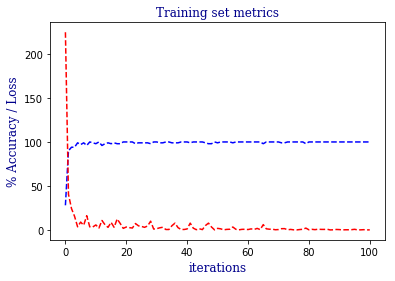

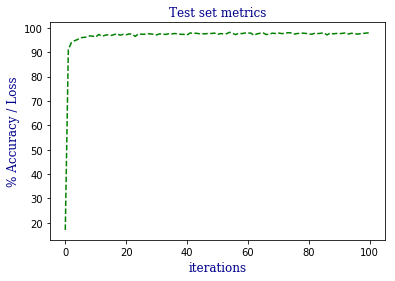

Maximum Training set accuracy: 100.0
Maximum Test set accuracy: 98.19999933242798


In [7]:
# Plot the Training and test accuracies and losses

#plotting using Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font={
    'family':'serif',
    'color' :'darkblue',
    'weight':'normal',
    'size':12,
}

x_vals=[i for i in range(0, 10000, 100)]

plt.figure(1)
plt.title('Training set metrics', fontdict=font)
plt.xlabel('iterations',fontdict=font)
plt.ylabel('% Accuracy / Loss',fontdict=font)
plt.plot(train_accuracy_, 'b--', train_loss, 'r--')
plt.show()

plt.figure(2)
plt.title('Test set metrics', fontdict=font)
plt.xlabel('iterations',fontdict=font)
plt.ylabel('% Accuracy / Loss',fontdict=font)
plt.plot(test_accuracy_, 'g--')
plt.show()

print("Maximum Training set accuracy: {}".format(max(train_accuracy_)))
print("Maximum Test set accuracy: {}".format(max(test_accuracy_)))

### Discussion of Results with the use of Neural Networks

#### Accuracy metrics
+ With one Layer,  Accuracy = 92%
+ With two Layers, Accuracy = 97% , Used GradientDescentOptimizer here
+ With 5 Layers Used, Accuracy = 97.8%, softmax_cross_entropy_with_logits_v2 , and used the AdamOptimizer here, GradientDescent Optimizer does not work here, why ?? Because of too many layers and the vanishing gradient problem
+ Using RELU function as the activation function decaying learning rate from 0.003 to 0.0001 decay_speed 2000, 10K iterations
Accuracy goes up to 98.19 now, that is amazing.
